## Interpret the data by making univariate analysis and indicate the points you consider important.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

states_year=pd.read_csv('data/states_year.csv')
states_year.describe(include='all')

,Unnamed: 0,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1715,1715,1715.000000,1.224000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,1.715000e+03,...,1632.000000,1632.000000,1632.000000,1.715000e+03,1.715000e+03,1.632000e+03,1715.000000,1715.000000,1715.000000,1715.000000
unique,NaN,1715,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2009_RHODE_ISLAND,ARKANSAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,857.000000,NaN,NaN,2002.075219,9.175416e+05,7.270506e+06,6.488380e+05,3.565740e+06,3.239542e+06,7.518533e+06,...,69166.507966,68106.537377,58420.870711,5.696683e+05,2.706907e+05,9.139695e+05,224.318598,270.522083,216.673632,261.166181
std,495.222172,NaN,NaN,9.568621,1.066514e+06,1.060730e+07,1.009398e+06,4.914099e+06,4.959717e+06,1.073144e+07,...,79957.990356,77965.847263,67438.530709,5.211587e+05,2.617084e+05,1.055893e+06,9.963167,8.372126,5.012101,4.135655
min,0.000000,NaN,NaN,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,428.500000,NaN,NaN,1994.000000,2.645145e+05,1.963205e+06,2.602770e+05,1.618602e+06,7.156800e+05,2.628014e+06,...,18971.500000,19594.250000,16076.500000,3.158105e+05,1.457900e+05,2.480832e+05,218.418605,266.325581,215.372093,260.000000
50%,857.000000,NaN,NaN,2002.000000,6.499335e+05,2.906573e+06,3.041770e+05,1.659028e+06,1.125436e+06,2.930393e+06,...,49087.000000,47880.000000,39408.000000,5.575071e+05,2.517678e+05,6.458050e+05,218.418605,266.325581,215.372093,260.000000
75%,1285.500000,NaN,NaN,2010.000000,1.010532e+06,8.165744e+06,6.732800e+05,3.837822e+06,3.484108e+06,8.220253e+06,...,78504.250000,78976.000000,69397.250000,5.575071e+05,2.528075e+05,1.043420e+06,231.000000,274.000000,217.000000,260.000000


## Consider a state and plot the yearly change of total revenues and total spending. Do these two variables change by years? Do you have years of summit and bottom?

In [53]:
states_year['STATE'].head()

0       ALABAMA
1        ALASKA
2       ARIZONA
3      ARKANSAS
4    CALIFORNIA
Name: STATE, dtype: object

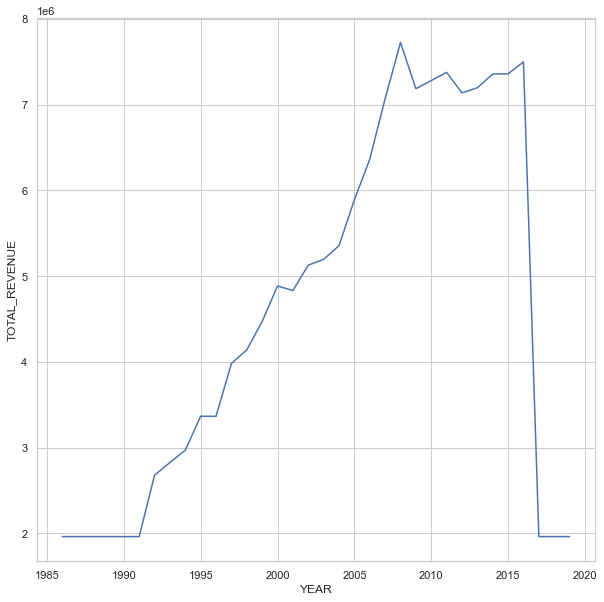

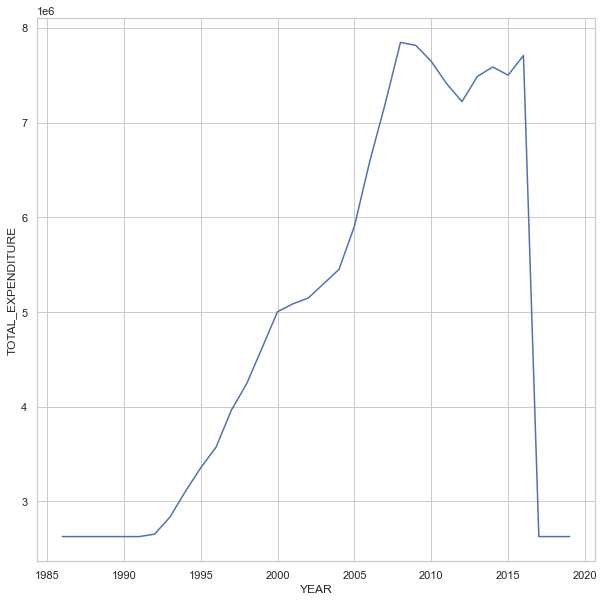

In [54]:
filter = states_year['STATE'].str.contains('ALABAMA')
alabama_info=states_year[filter]

fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(x="YEAR", y="TOTAL_REVENUE",data=alabama_info)

fig, ax = plt.subplots(figsize=(10, 10))
sns.lineplot(x="YEAR", y="TOTAL_EXPENDITURE",data=alabama_info)

plt.show()

## In which course are students more successful in your chosen state? Mathematics or reading?

In [55]:
alabama_info['alabama_math']=alabama_info['AVG_MATH_4_SCORE']+alabama_info['AVG_MATH_8_SCORE']
alabama_info['alabama_reading']=alabama_info['AVG_READING_4_SCORE']+alabama_info['AVG_READING_8_SCORE']

print('Average of math notes of Alabama',alabama_info['alabama_math'].mean())
print('Average of reading notes of Alabama',alabama_info['alabama_reading'].mean())
alabama_info.isna().sum()

Average of math notes of Alabama 486.51656095842145
Average of reading notes of Alabama 472.61945031712474


Unnamed: 0                      0
PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          9
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     7
GRADES_KG_G                     1
GRADES_4_G                      1
GRADES_8_G                      1
GRADES_12_G                     1
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    1
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
alabama_math                    0
alabama_reading                 0
dtype: int64

## What is the distribution of mathematics and reading grades?

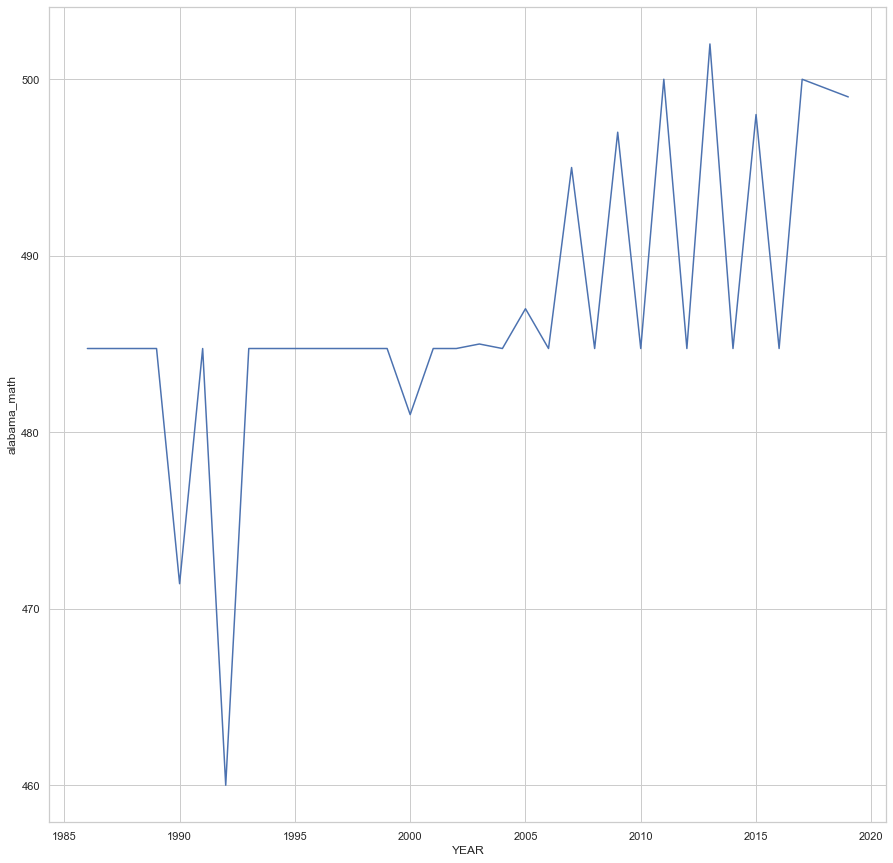

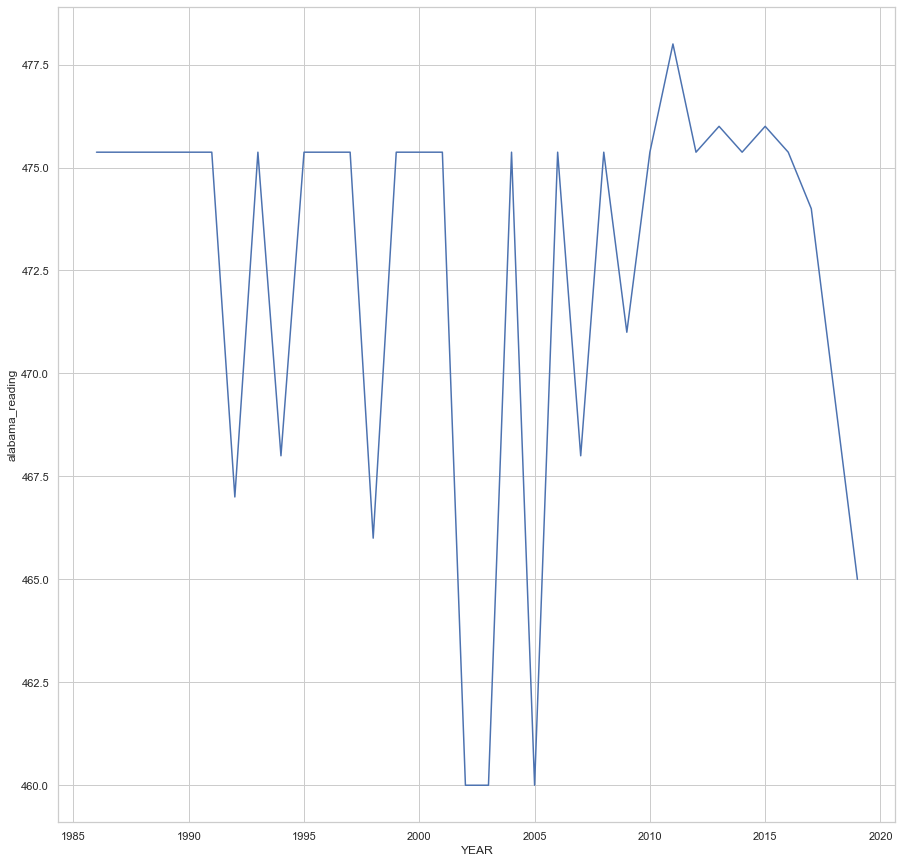

In [47]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.lineplot(x="YEAR", y="alabama_math",data=alabama_info)

fig, ax = plt.subplots(figsize=(15, 15))
sns.lineplot(x="YEAR", y="alabama_reading",data=alabama_info)
plt.show()

## You may have noticed that there are many missing values in the mathematics and reading notes. Complete the missing values with mean, median, and interpolation. Compare the impact of these techniques on the distribution of grades.

In [56]:
states_year.isna().sum()

Unnamed: 0                        0
PRIMARY_KEY                       0
STATE                             0
YEAR                              0
ENROLL                          491
TOTAL_REVENUE                     0
FEDERAL_REVENUE                   0
STATE_REVENUE                     0
LOCAL_REVENUE                     0
TOTAL_EXPENDITURE                 0
INSTRUCTION_EXPENDITURE           0
SUPPORT_SERVICES_EXPENDITURE      0
OTHER_EXPENDITURE                 0
CAPITAL_OUTLAY_EXPENDITURE        0
GRADES_PK_G                     173
GRADES_KG_G                      83
GRADES_4_G                       83
GRADES_8_G                       83
GRADES_12_G                      83
GRADES_1_8_G                      0
GRADES_9_12_G                     0
GRADES_ALL_G                     83
AVG_MATH_4_SCORE                  0
AVG_MATH_8_SCORE                  0
AVG_READING_4_SCORE               0
AVG_READING_8_SCORE               0
dtype: int64

In [51]:
states_year["AVG_MATH_4_SCORE"].fillna(states_year["AVG_MATH_4_SCORE"].mean(), inplace=True)
states_year["AVG_MATH_8_SCORE"].fillna(states_year["AVG_MATH_8_SCORE"].mean(), inplace=True)
states_year["AVG_READING_4_SCORE"].fillna(states_year["AVG_READING_4_SCORE"].mean(), inplace=True)
states_year["AVG_READING_8_SCORE"].fillna(states_year["AVG_READING_8_SCORE"].mean(), inplace=True)

states_year['alabama_math']=states_year['AVG_MATH_4_SCORE']+states_year['AVG_MATH_8_SCORE']
states_year['alabama_reading']=states_year['AVG_READING_4_SCORE']+states_year['AVG_READING_8_SCORE']

print('Average of math notes',states_year['alabama_math'].mean())
print('Average of reading notes',states_year['alabama_reading'].mean())


Average of math notes of Alabama 486.51656095842145
Average of reading notes of Alabama 472.61945031712474


Unnamed: 0                      0
PRIMARY_KEY                     0
STATE                           0
YEAR                            0
ENROLL                          9
TOTAL_REVENUE                   0
FEDERAL_REVENUE                 0
STATE_REVENUE                   0
LOCAL_REVENUE                   0
TOTAL_EXPENDITURE               0
INSTRUCTION_EXPENDITURE         0
SUPPORT_SERVICES_EXPENDITURE    0
OTHER_EXPENDITURE               0
CAPITAL_OUTLAY_EXPENDITURE      0
GRADES_PK_G                     7
GRADES_KG_G                     1
GRADES_4_G                      1
GRADES_8_G                      1
GRADES_12_G                     1
GRADES_1_8_G                    0
GRADES_9_12_G                   0
GRADES_ALL_G                    1
AVG_MATH_4_SCORE                0
AVG_MATH_8_SCORE                0
AVG_READING_4_SCORE             0
AVG_READING_8_SCORE             0
alabama_math                    0
alabama_reading                 0
dtype: int64